In [1]:
!pip install spotipy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.5/261.5 kB 8.6 MB/s eta 0:00:00


In [18]:
# Import required libraries
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials, SpotifyOAuth
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import random

# **Spotify Authorization Workflow: Credential Setup**

In [3]:
# Define Spotify API credentials
CLIENT_ID = '829be16fb27f43fd98c2332fcd335f7e'
CLIENT_SECRET = '309db9acfc034e08bb93d646aa13a120'
REDIRECT_URI = 'https://google.com/'

# Define scope
scope = 'playlist-read-private playlist-read-collaborative'

# Create OAuth object without automatic opening
sp_oauth = SpotifyOAuth(client_id=CLIENT_ID,
                        client_secret=CLIENT_SECRET,
                        redirect_uri=REDIRECT_URI,
                        scope=scope,
                        show_dialog=True)

# Generate the authorization URL
auth_url = sp_oauth.get_authorize_url()

# Manually display the authorization URL
print(f"Open this URL to authorize: {auth_url}")

# Paste the URL you get after authorization
redirected_url = input("Paste the redirected URL here: ")

# Extract authorization code from URL
code = sp_oauth.parse_response_code(redirected_url)

# Get token from the code
token_info = sp_oauth.get_access_token(code)

# Set the authorized Spotify object
sp = spotipy.Spotify(auth=token_info['access_token'])

print("✅ Authorization successful!")

🔗 Open this URL to authorize: https://accounts.spotify.com/authorize?client_id=829be16fb27f43fd98c2332fcd335f7e&response_type=code&redirect_uri=https%3A%2F%2Fgoogle.com%2F&scope=playlist-read-private+playlist-read-collaborative&show_dialog=True
🎯 Scope being used: playlist-read-private playlist-read-collaborative


In [8]:
# Optional: Manually set playlist ID if needed
#https://open.spotify.com/playlist/3ocM8VMdHSjut7hb7KYGAE?si=fdb435be30784058

#37i9dQZEVXbLRQDuF5jeBp
playlist_id = '3ocM8VMdHSjut7hb7KYGAE'  # US Top 50 playlist ID
# Get current user's profile to test if token is working
user_info = sp.current_user()
print(f"✅ Authenticated as: {user_info['display_name']}")

print(sp.playlist_tracks(playlist_id))

✅ Authenticated as: arav_raval
{'href': 'https://api.spotify.com/v1/playlists/3ocM8VMdHSjut7hb7KYGAE/tracks?offset=0&limit=100&additional_types=track', 'items': [{'added_at': '2023-08-02T13:12:44Z', 'added_by': {'external_urls': {'spotify': 'https://open.spotify.com/user/e6yh9ilfxti8n9vuw6ehywzme'}, 'href': 'https://api.spotify.com/v1/users/e6yh9ilfxti8n9vuw6ehywzme', 'id': 'e6yh9ilfxti8n9vuw6ehywzme', 'type': 'user', 'uri': 'spotify:user:e6yh9ilfxti8n9vuw6ehywzme'}, 'is_local': False, 'primary_color': None, 'track': {'preview_url': None, 'available_markets': ['AR', 'AU', 'AT', 'BE', 'BO', 'BR', 'BG', 'CA', 'CL', 'CO', 'CR', 'CY', 'CZ', 'DK', 'DO', 'DE', 'EC', 'EE', 'SV', 'FI', 'FR', 'GR', 'GT', 'HN', 'HK', 'HU', 'IS', 'IE', 'IT', 'LV', 'LT', 'LU', 'MY', 'MT', 'MX', 'NL', 'NZ', 'NI', 'NO', 'PA', 'PY', 'PE', 'PH', 'PL', 'PT', 'SG', 'SK', 'ES', 'SE', 'CH', 'TW', 'TR', 'UY', 'US', 'GB', 'AD', 'LI', 'MC', 'ID', 'JP', 'TH', 'VN', 'RO', 'IL', 'ZA', 'SA', 'AE', 'BH', 'QA', 'OM', 'KW', 'EG', '

In [9]:
# Get playlist tracks
def get_artists_from_playlist(playlist_id):
    results = sp.playlist_tracks(playlist_id)
    tracks = results['items']

    artist_list = []

    for item in tracks:
        track = item['track']
        for artist in track['artists']:
            artist_list.append(artist['name'])

    return list(set(artist_list))  # Remove duplicates

# Extract artists
artist_list = get_artists_from_playlist(playlist_id)
print(f"Found {len(artist_list)} unique artists in the playlist.")
print(artist_list)

Found 64 unique artists in the playlist.
['Kendrick Lamar', 'Lil Yachty', 'JID', 'King Von', 'Stormzy', 'Kanye West', 'Drake', 'Yeat', 'Headie One', 'Offset', 'Tee Grizzley', 'NAV', 'K-Trap', 'Trap Manny', 'JACKBOYS', 'Kacy Hill', 'Roddy Ricch', 'Skepta', 'Lil Durk', 'Big Sean', 'Trav Jr', 'Lil Baby', 'Travis Scott', 'Jme', 'A Boogie Wit da Hoodie', 'Baby Tate', 'Central Cee', 'AJ Tracey', 'Young Thug', 'Kodak Black', 'Meek Mill', 'A$AP Rocky', 'Armanio', 'Playboi Carti', 'Juice WRLD', 'Baby Keem', 'DJ Khaled', 'Nafe Smallz', 'Migos', 'Juicy J', 'D-Block Europe', 'Desiigner', '6ix9ine', 'Don Toliver', 'Sheck Wes', 'Pop Smoke', 'Gucci Mane', 'Sleepy Hallow', 'Rae Sremmurd', '21 Savage', 'Clavish', 'Lil Uzi Vert', 'Gunna', 'Giggs', 'Metro Boomin', 'SL', 'A$AP Ferg', 'A$AP Mob', 'Rob49', 'Dave', 'J. Cole', 'The Weeknd', 'Trippie Redd', 'Future']


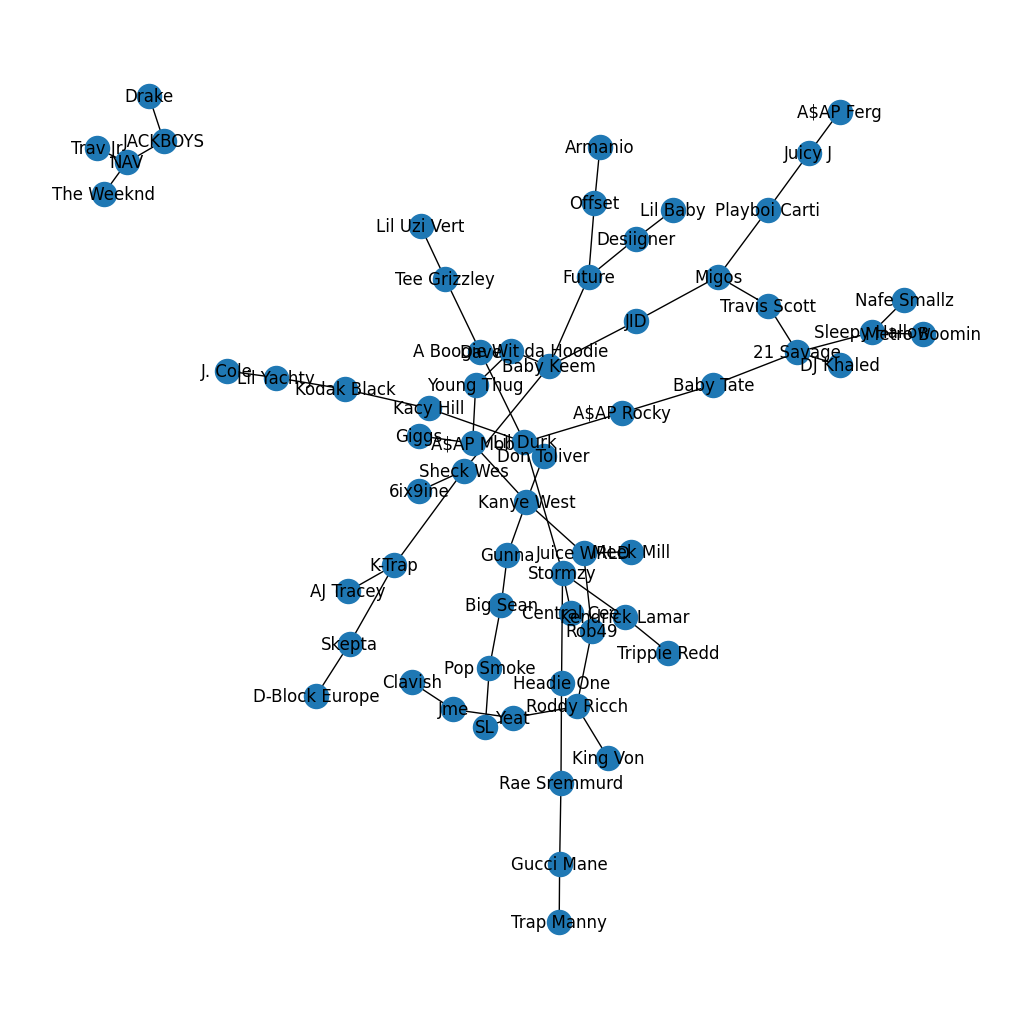

In [25]:
artist_graph = nx.Graph()
for artist in artist_list:
  artist_graph.add_node(artist)

for artist in artist_list:
  if artist_graph.has_node(artist):
    rand_connection = random.choice(artist_list)
    if rand_connection != artist:
      artist_graph.add_edge(artist, rand_connection)

plot = plt.figure(figsize=(10,10))
nx.draw(artist_graph, with_labels=True)
plot.show()

